# Чтение файлов в Python и командной строке. Практическая работа

### Цели практической работы
1. Научиться считывать информацию из файлов и совершать над ней операции с помощью кода на Python и командной строки.
2. Закрепить навыки стыковки команд в конвейеры и установки внешних пакетов с помощью пакетного менеджера pip.

### Что входит в практическую работу
1. Работа с файлами в командной строке.
2. Работа с файлами в Python 1.
3. Работа с файлами в Python 2.
4. Импортирование модулей.
5. Установка внешних модулей через pip.
6. Бонусное задание.

### Что оценивается
* Выполнены пять обязательных заданий, в каждом из них:
 * программа выполняет все описанные в задании действия;
 * результаты вычислений и применённых операций корректны;
 * стилизация кода соответствует рекомендациям [PEP 8](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html).


### Как отправить работу на проверку
Все задания собраны в один Jupyter Notebook. Выполните их, сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте итоговый файл Jupyter Notebook в формате IPYNB или ссылку на него через форму для сдачи практической работы.

---

## Задание 1. Работа с файлами в командной строке

Ранее вы считали количество всех слов в рассказе А. П. Чехова «Анна на шее». Теперь необходимо определить, сколько раз каждое слово встречается в тексте.

Вы уже знаете команды sort и uniq, умеете с их помощью считать количество уникальных строк в построчном файле. В результате у вас должен был получиться такой конвейер команд: `cat anna_words.txt | sort | uniq | wc -l`.

Команда cat перенаправляет слова из файла в команду sort, которая сортирует слова и передаёт упорядоченный список в команду uniq. Последняя удаляет дубликаты и направляет список уникальных слов в команду wc −l, которая их считает.

### Что нужно сделать

Посчитайте количество уникальных слов и определите частоту встречаемости каждого слова. Информацию в виде `частота слово` сохраните в текстовый файл. Для этого:
1. Измените конвейер команд так, чтобы он выводил слова и их частоту встречаемости на экран.
2. Перенаправьте вывод конвейера в текстовый файл `words_freq.txt`.

Если всё сделаете правильно, то получится текстовый файл `words_freq.txt`, в котором будут слова и их частота в виде:

```
...
   1 по-прежнему
   2 по-французски
  40 аня
   6 бал
   1 бог
   2 ваш
   2 вид
...
```

3. Скопируйте конвейер команд в ячейку, которая расположена непосредственно под этой.

### Подсказки
1. Ознакомьтесь с документацией команды uniq, обратите внимание на её ключ `-с`. Официальную документацию можно почитать прямо в командной строке: для этого выполните команду `man uniq`. Команда `man` (от англ. manual) выводит справку для команды, которая передаётся в man как аргумент. Если читать текст в терминале непривычно, то можете поискать информацию в интернете.

2. Перенаправить вывод команды в bash можно с помощью символа `>`. О том, как это сделать, читайте в интернете. Например, в статье [**«Перенаправление ввода вывода Linux»**](https://losst.ru/perenapravlenie-vvoda-vyvoda-linux). 

### Вставьте конвейер команд, который у вас получился

In [ ]:
!ls

11.2_Шпаргалка.docx	      11.6_Практическая_работа.ipynb
11.5_Пометка_по_пакетам.docx


---

## Задание 2. Работа с файлами в Python 1

### Что нужно сделать
В рассказе А. П. Чехова «Анна на шее» найдите десять слов, которые встречаются чаще всего. 

1. Напишите код на Python, который читает файл `word_freq.txt` по строкам, преобразует каждую из них в кортеж `(частота, слово)` и складывает полученные кортежи в список. 
2. Отсортируйте список по частотам, выведите на экран десять самых популярных слов и их частоты.

### Подсказки
1. Обратите внимание, что строки в файле содержат «лишние» символы: пробелы в начале и символ перевода строки в конце. Работать будет удобнее, если предварительно удалить их. Сделать это можно с помощью метода  `strip`. Ознакомьтесь с ним подробнее в [**официальной документации**](https://docs.python.org/3/library/stdtypes.html?highlight=strip#str.strip).

2. Сейчас частота и слово — это одна строка, в которой они разделены пробелом. Их можно разделить с помощью метода [**`split`**](https://docs.python.org/3/library/stdtypes.html?highlight=split#str.split).

3. Для сортировки в Python есть функция `sorted`. Она принимает на вход итерируемый объект, сравнивает его элементы между собой и возвращает итерируемый объект, который отсортирован. По умолчанию функция размещает элементы в порядке возрастания. Например, `sorted([2, 4, 1, 0])` вернёт `[0, 1, 2, 4]`. Подробнее про работу функции можно почитать в [**официальной документации**](https://docs.python.org/3/library/functions.html?highlight=sorted#sorted)

In [5]:
word_freq_list = []
with open("word_freq.txt", "r", encoding="utf-8") as file:
    for line in file:
        cleaned_line = line.strip()
        parts = cleaned_line.split()
        if len(parts) >= 2:
            frequency = int(parts[0])
            word = " ".join(parts[1:])
            word_freq_list.append((frequency, word))

sorted_list = sorted(word_freq_list, key=lambda x: x[0], reverse=True)

for i, (freq, word) in enumerate(sorted_list[:10], 1):
    print(f"{i}. '{word}' - {freq}")


1. 'аня' - 40
2. 'свой' - 28
3. 'говорить' - 19
4. 'алексеич' - 17
5. 'который' - 17
6. 'модест' - 17
7. 'сказать' - 17
8. 'это' - 17
9. 'отец' - 16
10. 'рука' - 16


---

## Задание 3. Работа с файлами в Python 2

### Что нужно сделать
Найдите букву, с которой чаще всего начинаются слова в рассказе А. П. Чехова «Анна на шее». 
1. Используйте файл с частотами слов `words_freq.txt`. 
2. Напишите код в Python, который выводит на экран самую популярную первую букву и количество слов на неё.


### Подсказки
Скорее всего, вы будете искать в словаре ключ с максимальным значением. Чтобы упростить работу, отсортируйте словарь. Сортировать словарь по значениям сложнее, чем список объектов, которые можно сравнивать непосредственно. Обратите внимание на параметр key функции [**sorted**](https://docs.python.org/3/library/functions.html?highlight=sorted#sorted).

In [6]:
letter_counts = {}

for freq, word in sorted_list:
    if word:
        first_letter = word[0].lower()
        if first_letter in letter_counts:
            letter_counts[first_letter] += freq
        else:
            letter_counts[first_letter] = freq

sorted_letters = sorted(letter_counts.items(), key=lambda x: x[1], reverse=True)

most_common = sorted_letters[0]

print(f"Самая популярная первая буква: '{most_common[0]}'")
print(f"Количество слов на эту букву: {most_common[1]}")


Самая популярная первая буква: 'п'
Количество слов на эту букву: 318


---

## Задание 4. Импортирование модулей

###Что нужно сделать
Напишите функцию `circ_sqrt`. Она должна принимать один параметр `r` типа `float` и возвращать квадратный корень из длины окружности радиуса `r`.

### Подсказки
- Используйте функции встроенного модуля math.
- В работе функции учтите область определения квадратного корня.

In [7]:
import math

def circ_sqrt(r: float) -> float:
    if r < 0:
        return 0.0
    circumference = 2 * math.pi * r
    return math.sqrt(circumference)

result = circ_sqrt(5.0)
print(f"Результат для радиуса 5.0: {result:.4f}")

Результат для радиуса 5.0: 5.6050


---

## Задание 5. Установка внешних модулей через pip

### Что нужно сделать

Установите пакеты из PyPi с помощью пакетного менеджера pip и используйте их в коде. 
1. Установите пакет `cowsay`.
2. Установите в систему пакет `wikipedia` — Python API для очень популярной онлайн-энциклопедии.
3. Напишите функцию `random_article`, которая выводит на экран очень умную корову. Корова должна «рассказывать» краткое содержание случайной статьи из «Википедии» на английском языке.


### Подсказки

Вам понадобятся следующие функции пакета `wikipedia`:

* [**wikipedia.random**](https://wikipedia.readthedocs.io/en/latest/code.html#wikipedia.random)
* [**wikipedia.summary**](https://wikipedia.readthedocs.io/en/latest/code.html#wikipedia.summary)

In [8]:
import cowsay
import wikipedia

title = wikipedia.random()
data = wikipedia.summary(title)

cowsay.cow(f'{data}')

  _________________________________________________
 /                                                 \
| YB Music is an independent record label establish |
| ed in São Paulo, Brazil. It started in 1999, rele |
| asing music from new underground artists as well  |
| as revival acts. Its catalog includes different s |
| tyles of Brazilian music featuring hip hop, samba |
| -rock revisited by (Trio Mocotó), electronic musi |
| c (Anvil FX), instrumental music including classi |
| cal music and jazz (Sujeito a Guincho, Quarteto C |
| amargo Guarnieri, Nouvelle), (Curumin, Instituto) |
| , and mangue beat from Recife. The label was resp |
| onsible for the first album by Nação Zumbi after  |
| the death of their frontman Chico Science. The la |
| bel received in 2001, 2005 and 2012 the APCA  (Sã |
| o Paulo Art Critics Association) prize with the r |
| eleases of Samba Rock (Best Group - Trio Mocotó), |
|   Samba Power (Best Album) and Badi Assad (Best C |
| omposer) respectively.       

---

## Задание 6. Бонусное

### Что нужно сделать

Выясните, как слова в рассказе «Анна на шее» распределяются по длине. 

1. Посчитайте, сколько слов длины 1, 2 и так далее в файле anna_words.txt.

2. Выведите на экран информацию в формате `длина количество_слов`, отсортируйте её по возрастанию длины.

3. Перенесите вывод программы в Excel или Google Таблицы и постройте столбчатую диаграмму. 

4. Сравните ваш график с [распределением русских слов по длине](http://nskhuman.ru/unislov/statist.php?nstat=21). В гистограмме по ссылке больше данных, поэтому она лучше показывает соотношение длины слов и их количества в русском языке.

### Советы и рекомендации
Вероятнее всего, вы снова будете использовать словарь. Ключами в нём будет длина слов, а значениями — количество слов этой длины. Обратите внимание, что словарь нужно сортировать по ключам, а не по значениям, как вы делали ранее.

In [9]:
length_counts = {}

with open('anna_words.txt', 'r', encoding='utf-8') as file:
    for line in file:
        word = line.strip()
        if word:
            length = len(word)
            if length in length_counts:
                length_counts[length] += 1
            else:
                length_counts[length] = 1

sorted_lengths = sorted(length_counts.items())

print("Длина\tКоличество слов")
for length, count in sorted_lengths:
    print(f"{length}\t{count}")

with open('word_lengths.csv', 'w', encoding='utf-8') as csv_file:
    csv_file.write("Длина,Количество слов\n")
    for length, count in sorted_lengths:
        csv_file.write(f"{length},{count}\n")

Длина	Количество слов
1	6
2	13
3	127
4	299
5	288
6	334
7	399
8	314
9	182
10	124
11	111
12	45
13	21
14	11
15	7
16	1
17	4
18	2


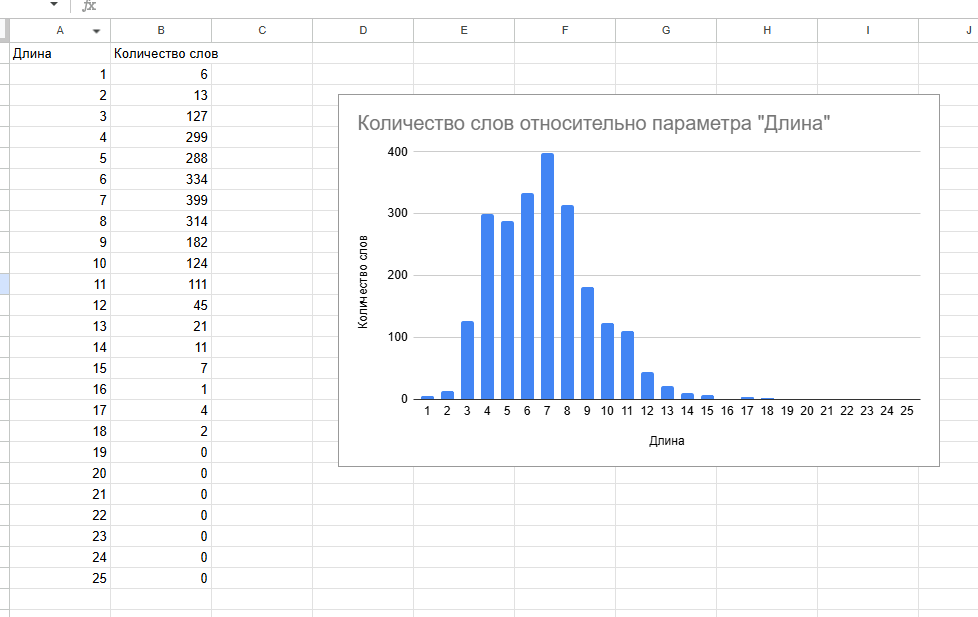
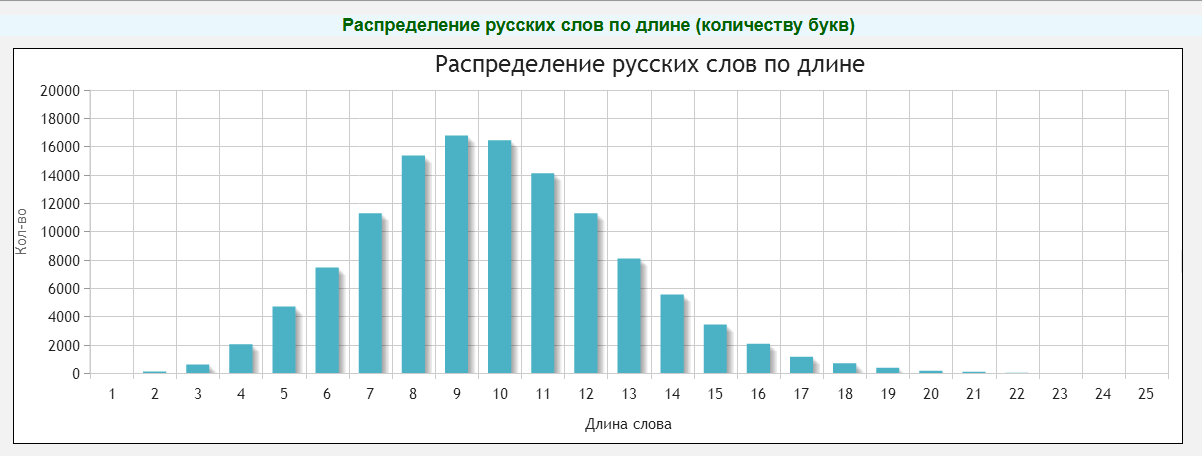

Есть разница, в нашем распределении матожидание меньше,  а также оно менее гладкое.